<a href="https://colab.research.google.com/github/buzzaggwd/ML/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подбор признаков и валидация моделей

## Загрузка библиотек и предобратка данных

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [3]:
# Загрузка набора данных
df = pd.read_csv('/content/heart_disease.csv')

In [4]:
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [5]:
df['old_people'] = np.where(df['age'] >= 65, 1, 0)
df.old_people = df.old_people.astype('category')
df['sex'] = df['sex'].astype('category')

In [6]:
Y = df['old_people'] # Выбираем целевую переменную (категориальную)
X = df.drop('old_people', axis=1) # Переменные для проверки влияния

# Дропаем базовую переменную, а не только Y
X = X.drop('age', axis=1)

In [7]:
df.drop('age', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   sex                                   270 non-null    category
 1   chest pain type                       270 non-null    int64   
 2   resting blood pressure                270 non-null    int64   
 3   serum cholestoral in mg/dl            270 non-null    int64   
 4   fasting blood sugar > 120 mg/dl       270 non-null    int64   
 5   resting electrocardiographic results  270 non-null    int64   
 6   maximum heart rate achieved           270 non-null    int64   
 7   exercise induced angina               270 non-null    int64   
 8   oldpeak                               270 non-null    float64 
 9   slope of peak                         270 non-null    int64   
 10  number of major vessels               270 non-null    int64   
 11  thal  

In [8]:
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,old_people
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0,0


## Масштабирование признаков

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   sex                                   270 non-null    category
 1   chest pain type                       270 non-null    int64   
 2   resting blood pressure                270 non-null    int64   
 3   serum cholestoral in mg/dl            270 non-null    int64   
 4   fasting blood sugar > 120 mg/dl       270 non-null    int64   
 5   resting electrocardiographic results  270 non-null    int64   
 6   maximum heart rate achieved           270 non-null    int64   
 7   exercise induced angina               270 non-null    int64   
 8   oldpeak                               270 non-null    float64 
 9   slope of peak                         270 non-null    int64   
 10  number of major vessels               270 non-null    int64   
 11  thal  

In [10]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # Собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [11]:
X_processed

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True


In [12]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [13]:
X_processed

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,0.387097,2,3,3,1,True
1,3,115,564,0,2,160,0,0.258065,2,0,7,0,False
2,2,124,261,0,0,141,0,0.048387,1,0,7,1,True
3,4,128,263,0,0,105,1,0.032258,2,1,7,0,True
4,2,120,269,0,2,121,1,0.032258,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.080645,1,0,7,0,True
266,2,120,263,0,0,173,0,0.000000,1,0,7,0,True
267,2,140,294,0,2,153,0,0.209677,2,0,3,0,False
268,4,140,192,0,0,148,0,0.064516,2,0,6,0,True


## Очистка данных и удаление выбросов

### Методы обработки выбросов:

1. **Метод на основе медианы и межквартильного размаха (IQR)**:
   - **Как работает**:
     Метод основан на расчете межквартильного размаха (IQR), который вычисляется как разница между третьим (75-й перцентиль) и первым квартилем (25-й перцентиль). Данные считаются выбросами, если они выходят за пределы диапазона \([Q1 - 1.5 * IQR , Q3 + 1.5 * IQR]\).
   - **Зачем это нужно**:
     Выбросы могут серьезно искажать результаты моделей, особенно тех, которые основаны на средних значениях или предполагают нормальное распределение данных.
   - **Когда лучше использовать**:
     - Когда данные содержат **немного выбросов** и имеют **асимметричное распределение**.
     - Метод медианы и IQR более устойчив к выбросам по сравнению с методом, основанным на среднем значении, так как медиана меньше подвержена влиянию экстремальных значений.
     - Хорошо подходит для набора данных, которые не распределены нормально (например, зарплаты или цены на недвижимость).

2. **Метод на основе среднего (Mean)**:
   - **Как работает**:
     Метод использует средние значения и удаляет те признаки или записи, которые значительно отклоняются от среднего. Чаще всего это делается с помощью установления порога (например, данные, которые превышают 2 или 3 средних значения, считаются выбросами).
   - **Зачем это нужно**:
     Выбросы, сильно отличающиеся от средних значений, могут существенно влиять на такие модели, как линейная регрессия, так как среднее значение сильно чувствительно к экстремальным точкам.
   - **Когда лучше использовать**:
     - Когда данные имеют **нормальное распределение** или приближены к нормальному.
     - Подходит, если данные содержат **много выбросов**, и вам нужно жестче ограничить их влияние на модель.

### Как выбрать метод:

- **Если данные асимметричны** или распределены с "хвостами" (например, распределение доходов или цен), лучше использовать **метод на основе медианы и IQR**, так как медиана не чувствительна к выбросам и лучше описывает такие наборы данных.
  
- **Если данные нормально распределены** и важно учитывать всю выборку, даже если есть выбросы, можно использовать **метод на основе среднего**. Этот метод будет точнее отражать центр распределения в симметричных данных и позволит выявить значительные отклонения от него.

Оба метода помогают улучшить производительность моделей машинного обучения, обеспечивая более точное представление данных для анализа и обучения.

## Для начала определим функцию обучения с оценкой качества (для простоты)

In [14]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [15]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8796
Точность на тестовой выборке: 0.8333

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.33      0.12      0.18         8

    accuracy                           0.83        54
   macro avg       0.60      0.54      0.54        54
weighted avg       0.78      0.83      0.80        54



LogisticRegression(max_iter=1000)

### Метод 1: удаление на основе медианы

In [16]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [17]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [18]:
X_processed.describe()

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,0.169355,1.585185,0.670370,4.696296,0.444444
std,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,0.184711,0.614390,0.943896,1.940659,0.497827
min,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.129032,2.000000,0.000000,3.000000,0.000000
75%,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,0.258065,2.000000,1.000000,7.000000,1.000000
max,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,1.000000,3.000000,3.000000,7.000000,1.000000


In [19]:
X_iqr.describe()

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
count,229.000000,229.000000,229.000000,229.0,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,3.213974,130.253275,247.742358,0.0,0.995633,149.414847,0.331878,0.170940,1.572052,0.624454,4.646288,0.449782
std,0.942457,17.198698,47.536034,0.0,0.997795,23.528779,0.471919,0.188504,0.592575,0.912157,1.935755,0.498561
min,1.000000,94.000000,141.000000,0.0,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,3.000000,120.000000,213.000000,0.0,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,4.000000,130.000000,244.000000,0.0,1.000000,153.000000,0.000000,0.129032,2.000000,0.000000,3.000000,0.000000
75%,4.000000,140.000000,275.000000,0.0,2.000000,168.000000,1.000000,0.290323,2.000000,1.000000,7.000000,1.000000
max,4.000000,192.000000,409.000000,0.0,2.000000,202.000000,1.000000,1.000000,3.000000,3.000000,7.000000,1.000000


In [20]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.8907
Точность на тестовой выборке: 0.8478

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.00      0.00      0.00         6

    accuracy                           0.85        46
   macro avg       0.43      0.49      0.46        46
weighted avg       0.75      0.85      0.80        46



LogisticRegression(max_iter=1000)

Точность на обеих выборках значительно увеличилась (на обучающей с 0.8796 до 0.8907, на тестовой с 0.8333 до 0.8478). Поскольку мы удалили выбросные значения, у нас уменьшилось общее количество значений и средние значения по каждому столбцу. Значения в fasting blood sugar > 120 mg/dl вообще обратились в ноль (видимо были выбросные).

### Метод 2: удаление на основе среднего

In [21]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [22]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [23]:
X_processed.describe()

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,0.169355,1.585185,0.670370,4.696296,0.444444
std,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,0.184711,0.614390,0.943896,1.940659,0.497827
min,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.129032,2.000000,0.000000,3.000000,0.000000
75%,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,0.258065,2.000000,1.000000,7.000000,1.000000
max,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,1.000000,3.000000,3.000000,7.000000,1.000000


In [24]:
X_mean.describe()

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
count,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,3.341176,127.605882,245.952941,0.0,0.970588,151.764706,0.294118,0.132353,1.447059,0.452941,4.547059,0.394118
std,0.777691,14.644625,42.144554,0.0,0.999565,20.909581,0.456991,0.148053,0.498658,0.688552,1.912468,0.490104
min,2.000000,100.000000,149.000000,0.0,0.000000,105.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,3.000000,118.000000,212.250000,0.0,0.000000,138.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,4.000000,128.000000,243.500000,0.0,0.000000,156.000000,0.000000,0.080645,1.000000,0.000000,3.000000,0.000000
75%,4.000000,140.000000,273.250000,0.0,2.000000,168.000000,1.000000,0.225806,2.000000,1.000000,7.000000,1.000000
max,4.000000,160.000000,353.000000,0.0,2.000000,192.000000,1.000000,0.516129,2.000000,2.000000,7.000000,1.000000


In [25]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.8897
Точность на тестовой выборке: 0.8824

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       0.00      0.00      0.00         4

    accuracy                           0.88        34
   macro avg       0.44      0.50      0.47        34
weighted avg       0.78      0.88      0.83        34



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

Так, ну отностельно обучения с выбросами изначального, ситуация стала лучше (по обучающей выборке с 0.8796 до 0.8897 поднялось, по тестовой с 0.8333 до 0.8824). Но все еще хуже, чем у удаления выбросов на основе медианных значений. И снова у нас в ноль ушла строка fasting blood sugar > 120 mg/dl.

## Методы отбора признаков

Отбор признаков (feature selection) — важный шаг в машинном обучении, который помогает улучшить качество моделей и ускорить их работу. Цель отбора — убрать лишние или малозначимые признаки, которые не влияют на предсказания модели, либо могут ухудшить её производительность.

Зачем это нужно:
1. **Улучшение производительности модели** — избыточные признаки могут создавать шум и снижать точность.
2. **Повышение интерпретируемости** — меньший набор признаков легче анализировать и объяснять.
3. **Снижение вычислительной сложности** — меньшее количество признаков ускоряет обучение и предсказание.

В sklearn основные методы отбора признаков включают:
1. **Filter методы** — основаны на статистических тестах, например, `SelectKBest` использует критерий, чтобы выбрать признаки с наибольшим вкладом.
2. **Wrapper методы** — оценивают модели на разных подмножествах признаков, например, рекурсивное исключение признаков (`RFE`).
3. **Embedded методы** — выполняют отбор признаков во время обучения модели, например, с помощью L1-регуляризации (Lasso).

### Filter методы

Filter методы основаны на статистических свойствах данных и выбирают признаки, не учитывая алгоритм машинного обучения. Они работают как предварительный шаг перед обучением модели и быстро отбирают наиболее информативные признаки.

Преимущества:

- Быстро выполняются.
- Не зависят от модели.
- Уменьшают размерность данных до обучения.

Недостатки:

- Не учитывают взаимодействие между признаками.
- Могут упускать важные комбинации признаков.

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression

In [27]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [28]:
selector.scores_

array([1.27777541e-02, 4.32296750e+00, 3.38443584e+00, 4.53119230e-01,
       1.16608001e+00, 1.37583129e+01, 3.20707014e-01, 1.34073903e-01,
       2.51466616e-01, 1.22931621e+01, 4.51542635e-01, 1.52082624e-01,
       1.97770672e+00])

In [29]:
X_processed.columns

Index(['chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl      ', 'fasting blood sugar > 120 mg/dl ',
       'resting electrocardiographic results', 'maximum heart rate achieved  ',
       'exercise induced angina    ', 'oldpeak ', 'slope of peak',
       'number of major vessels ', 'thal', 'Disease', 'sex_1'],
      dtype='object')

In [30]:
X_processed

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,0.387097,2,3,3,1,True
1,3,115,564,0,2,160,0,0.258065,2,0,7,0,False
2,2,124,261,0,0,141,0,0.048387,1,0,7,1,True
3,4,128,263,0,0,105,1,0.032258,2,1,7,0,True
4,2,120,269,0,2,121,1,0.032258,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.080645,1,0,7,0,True
266,2,120,263,0,0,173,0,0.000000,1,0,7,0,True
267,2,140,294,0,2,153,0,0.209677,2,0,3,0,False
268,4,140,192,0,0,148,0,0.064516,2,0,6,0,True


SelectPercentile удаляет все функции, кроме указанного пользователем процента с наивысшей оценкой.

In [54]:
from sklearn.feature_selection import SelectPercentile, chi2

In [62]:
selector = SelectPercentile(chi2, percentile=20)  # Меняем значение percentile, чтобы проверить результат
X_new = selector.fit_transform(X_processed, Y)

In [63]:
selector.get_support(indices=True)

array([2, 5, 9])

In [64]:
# Получаем список отобранных признаков
selected_indices = selector.get_support(indices=True)
selected_features = X_processed.columns[selected_indices]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['serum cholestoral in mg/dl      ', 'maximum heart rate achieved  ',
       'number of major vessels '],
      dtype='object')


In [65]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_new, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8657
Точность на тестовой выборке: 0.8519

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.50      0.12      0.20         8

    accuracy                           0.85        54
   macro avg       0.68      0.55      0.56        54
weighted avg       0.81      0.85      0.81        54



LogisticRegression(max_iter=1000)

In [51]:
X_kbest_df # Для себя, посмотреть чисто

,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,number of major vessels,sex_1
0,130.0,322.0,109.0,3.0,1.0
1,115.0,564.0,160.0,0.0,0.0
2,124.0,261.0,141.0,0.0,1.0
3,128.0,263.0,105.0,1.0,1.0
4,120.0,269.0,121.0,1.0,0.0
...,...,...,...,...,...
265,172.0,199.0,162.0,0.0,1.0
266,120.0,263.0,173.0,0.0,1.0
267,140.0,294.0,153.0,0.0,0.0
268,140.0,192.0,148.0,0.0,1.0


### Wrapper методы

Wrapper методы оценивают различные комбинации признаков, обучая модель на каждом подмножестве, и выбирают набор признаков, который дает наилучшее качество модели. Они учитывают взаимодействия между признаками, но могут быть вычислительно затратными.

Преимущества:

- Учитывают взаимодействия между признаками.
- Могут улучшить производительность модели.

Недостатки:

- Высокая вычислительная сложность.
- Длительное время выполнения на больших наборах данных.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Отобранные признаки: Index(['resting electrocardiographic results', 'exercise induced angina    ',
       'number of major vessels ', 'Disease', 'sex_1'],
      dtype='object')


In [ ]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)


Точность на обучающей выборке: 0.8565
Точность на тестовой выборке: 0.7778

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        46
           1       0.00      0.00      0.00         8

    accuracy                           0.78        54
   macro avg       0.42      0.46      0.44        54
weighted avg       0.72      0.78      0.75        54



### Embedded методы

Преимущества:

Учитывают взаимодействия между признаками.
- Менее вычислительно затратны, чем Wrapper методы.
- Интегрированы в процесс обучения.
Недостатки:

- Зависимы от выбранной модели.
- Могут не отбирать признаки, важные для других моделей.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели без регуляризации: [[-0.12199093  0.02100505  0.0047454  -0.0629509   0.15524833 -0.03816353
  -0.56112969 -0.43407858 -0.19117919  0.5769263  -0.11207316 -0.60465177
  -0.15876609]]
Коэффициенты модели с регуляризацией: [[-0.06969276  0.02125499  0.00524035  0.          0.09797494 -0.03498379
  -0.52159967  0.         -0.12634713  0.53296795 -0.1346441  -0.58253595
   0.        ]]
Отобранные признаки: Index(['chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl      ',
       'resting electrocardiographic results', 'maximum heart rate achieved  ',
       'exercise induced angina    ', 'slope of peak',
       'number of major vessels ', 'thal', 'Disease'],
      dtype='object')
Коэффициенты модели после отбора признаков: [[-0.06977705  0.02122461  0.00524128  0.09795325 -0.03496202 -0.52138509
  -0.12590219  0.53295096 -0.13461578 -0.58215905]]


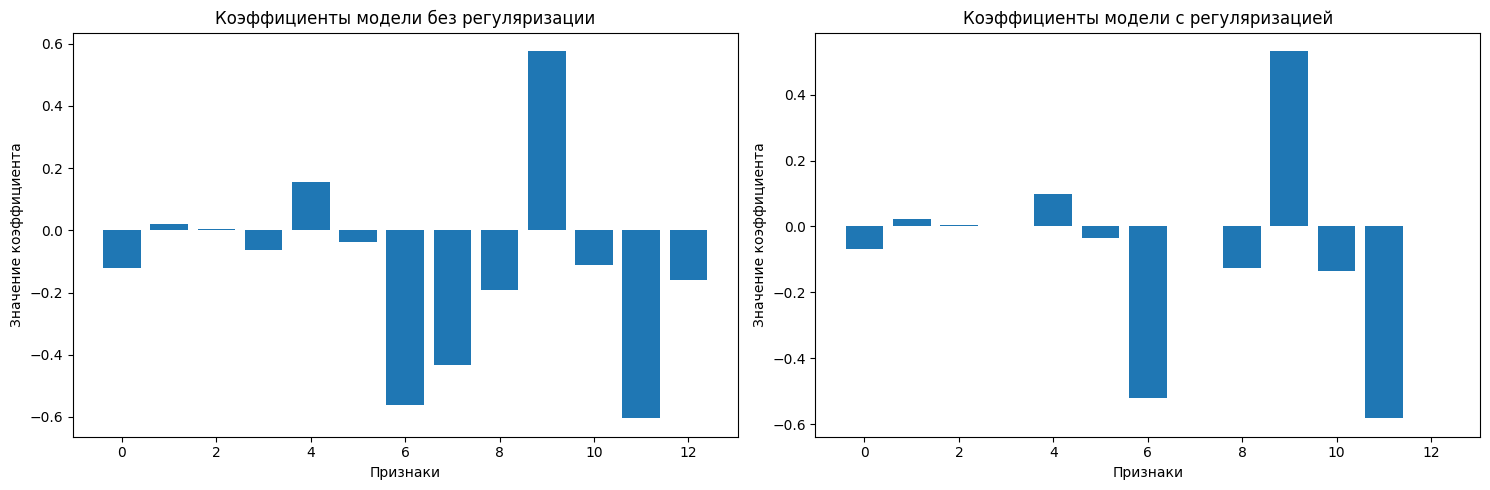

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [ ]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)


Точность на обучающей выборке: 0.8750
Точность на тестовой выборке: 0.8333

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.33      0.12      0.18         8

    accuracy                           0.83        54
   macro avg       0.60      0.54      0.54        54
weighted avg       0.78      0.83      0.80        54



⏰ Проэксперементировать с разным количеством k, найти лучшую модель, объяснить результат

⏰ Изучить метод отбора SequentialFeatureSelector, описать способ работы, сравнить результат с прошлыми методами и объяснить полученный результат

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SequentialFeatureSelector(model_with_penalty, n_features_to_select =5, direction='forward', scoring='accuracy')
selector.fit(X_processed, Y)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Коэффициенты модели без регуляризации: [[-0.12199093  0.02100505  0.0047454  -0.0629509   0.15524833 -0.03816353
  -0.56112969 -0.43407858 -0.19117919  0.5769263  -0.11207316 -0.60465177
  -0.15876609]]
Коэффициенты модели с регуляризацией: [[-0.06981728  0.02122191  0.00524275  0.          0.09793075 -0.03496133
  -0.52135445  0.         -0.12586074  0.53297077 -0.1346203  -0.58221286
   0.        ]]
Отобранные признаки: Index(['chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl      ', 'fasting blood sugar > 120 mg/dl ',
       'resting electrocardiographic results'],
      dtype='object')
Коэффициенты модели после отбора признаков: [[-0.10709049  0.00486122  0.00267543  0.          0.09804794]]


In [ ]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8611
Точность на тестовой выборке: 0.8519

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        46
           1       0.00      0.00      0.00         8

    accuracy                           0.85        54
   macro avg       0.43      0.50      0.46        54
weighted avg       0.73      0.85      0.78        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Здесь точность примерно такая же, как и в предыдущих методах. В Filter методе точность на обучающей выборке 0.8657, а на тестовой 0.8333. В Wrapper методе точность на обучающей 0.8565, а на тестовой 0.7778. В Embedded обучающая 0.8750, тестовая 0.8333. Итак, смотрим на SequentialFeatureSelector. Тут у нас на обучающей точность 0.8611, а на тестовой 0.8519. Норм значения получились, не хорошо, не плохо, нормикс.

## Логистическая регрессия

**Логистическая регрессия** — это модель для задач бинарной классификации, которая предсказывает вероятность того, что наблюдение принадлежит к одному из двух классов (например, 0 или 1). Модель основана на линейной регрессии, но использует **сигмоидную функцию активации** для приведения предсказаний в диапазон от 0 до 1. Логистическая регрессия идеально подходит для задач, где нужно классифицировать данные на два класса.


#### Принцип работы логистической регрессии:
1. Сначала вычисляется линейная комбинация признаков с весами:  
y = b + w1 * x1 + w2 * x2 + w(n) * x(n), где

x - переменные

w - веса (коэфициенты регресси)

b - смещение

Затем результат линейной комбинации передается в сигмоидную функцию активации, которая преобразует результат в значение от 0 до 1.

### Функция активации (Сигмоида)
**Сигмоидная функция** в логистической регрессии используется для преобразования линейной комбинации признаков в вероятность, что наблюдение относится к классу 1. Формула сигмоиды:

sigmoida = 1 / (1 + e^-y)

Она всегда возвращает значение в диапазоне от 0 до 1, что удобно для интерпретации как вероятность принадлежности к классу 1.

Принцип работы:
1. Инициализация весов: Изначально все веса устанавливаются в нули.

2. Градиентный спуск: На каждой итерации:
- Вычисляется линейная комбинация признаков.
- Применяется сигмоидная функция для предсказания вероятностей.
- Градиенты вычисляются для обновления весов и смещения, минимизируя ошибку.

Предсказание: Для новых данных модель возвращает вероятность, которая затем конвертируется в классы 0 или 1.

In [ ]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [ ]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)


regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


## Кросс-валидация

**Кросс-валидация** — это метод оценки качества моделей машинного обучения, который помогает избежать переобучения и получить более надежную оценку. Она заключается в разделении данных на несколько частей и обучении модели на различных подмножествах данных, чтобы проверить ее способность обобщать на новых данных.

Основные цели кросс-валидации:

Проверить, насколько хорошо модель будет работать на новых данных.
Определить, есть ли у модели проблемы с переобучением (overfitting) или недообучением (underfitting).
Помочь выбрать наилучшую модель или гиперпараметры.

#### Виды кросс-валидации
1. K-fold Cross-Validation:

Данные делятся на K равных частей (folds). Модель обучается на K-1 частях и тестируется на оставшейся части. Процесс повторяется K раз, и результат — среднее качество по всем K итерациям.
Этот метод позволяет эффективно использовать все данные как для обучения, так и для тестирования.

2. ShuffleSplit:

Этот метод несколько раз случайно перемешивает данные и делит их на тренировочные и тестовые выборки. В отличие от K-fold, здесь нет необходимости в разделении на фиксированное количество частей.
Хорошо работает на небольших выборках данных и для оценки стабильности модели.

3. Train-Test-Validation Split:

Данные делятся на три части: тренировочные данные для обучения модели, тестовые данные для первичной оценки и валидационные данные для окончательной оценки.
Полезен для задач, где требуется как тестирование, так и финальная проверка на отложенных данных.

In [ ]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [ ]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=9):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Fold Cross-Validation - Средняя точность: 0.8444444444444446
Точности по каждому фолду: [0.9, 0.8666666666666667, 0.8666666666666667, 0.7666666666666667, 0.8333333333333334, 0.9, 0.8666666666666667, 0.8, 0.8]


 При n_splits=5 средняя точность 0.8481481481481481. Меняем на 6, получили 0.8518518518518517, при 7 =0.8516483516483516. Идем в обратную сторону - меняем n_splits на 4, получаем среднюю точность 0.8295654082528534, при 3 =0.8481481481481481.Ну вот, чем на большее количество частей мы делим данные, тем выше точность. Посмотрим 9 еще чтобы подтвердить гипотезу - 0.8444444444444446. Не, не то. Ну значит самое хорошее разбиение при К-фолдовой кросс-валидации это на 6 частей.

In [ ]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())


ShuffleSplit Cross-Validation - Средняя точность: 0.8518518518518519
Точности по каждому разделению: [0.8611111111111112, 0.8148148148148148, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112]


Так, при n_splits=5 здесь средняя 0.8425925925925926. Изменим процент тестовой выборки, теперь он будет 0.5, и тогда средняя точность равна 0.8385185185185184. Понизилась, не очень круто. Тогда сделаем процент меньше. При 0.3 средняя =0.8864197530864197. Вооооуу, вот это другое дело, мне нравится👍

In [ ]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.8765432098765432
Точность на тестовых данных: 0.8421052631578947


Таак, ну здесь на три части делятся данные, мега проверка такая. При первом разбиении на 20/80 и втором 20/80 точность 0.8888888888888888, уже хороший результат, все круто. Чуть-чуть поменяем, теперь сделаем при первом разбиении 30/70, и при втором 30/70, точность =0.8765432098765432, плаки-плаки, стало хуже.

Ну окей, лучший результат получился..... получился.... у..... Train-Test-Validation Splitа!! Ееее апплодисменты победителю! И кубок 🏆.